Датасет с Data Science зарплатами содержит 11 столбцов, где:


* work_year: Год, когда была выплачена зарплата.
* experience_level: Уровень опыта работы на данной должности в течение года
* employment_type: Тип занятости для данной роли
* job_title: Должность, на которой работал сотрудник в течение года.
* salary: Общая сумма зарплаты GROSS
* salary_currency: Валюта зарплаты в виде кода валюты ISO 4217.
* salaryinusd: зарплата в долларах США. Целевая переменная.
* employee_residence: Основная страна пребывания сотрудника в течение рабочего года в виде кода страны ISO 3166.
* remote_ratio: Общий объем работы, выполняемой удаленно
* company_location: Страна, в которой находится главный офис или филиал работодателя.
* company_size: Медианное количество человек, работавших в компании в течение года

2. Изучите признаки, проведите правильный описательный анализ признаков.

3. Удалите / заполните / замените пропуски или ошибки в данных.

4. Обязательно проверьте наличие дубликатов В СТРОКАХ и удалите, если они есть (команды в pandas: duplicated, drop_duplicates).
 Дублем является тот объект, который является идентичный другому (то есть одна строка равна другой).

5. Выполните следующую аналитику:

Какие самые высокооплачиваемые должности? 
Есть ли выбросы в заработной плате? В каких должностях?
Влияет ли удаленная работа на зарплату? Есть ли корреляция?
Зависит ли заработная плата от размера предприятия?
Какие страны наиболее популярны среди вакансий? В каких заработная плата выше, а в каких ниже?
Оцените медианную зарплату для каждой должности.
Оцените, как сильно изменились зарплаты в 2023 году, относительно 2020. Какие должности стали более оплачиваемы, а какие нет?
Выявите портрет самого успешного и богатого работника: кем он должен работать, где проживать, удаленная ли работа.
Много ли людей работают и проживают в разных регионах? Где больше всего людей проживает и много ли из них (в процентном соотношении) 
работают удаленно на другую страну?
Выявите новые инсайты, если захотите! Творите!
6. Работу выполните в Jupyter Notebook. Используйте pandas, matplotlib, seaborn и любые другие библиотеки для визуализации. 
Можно пользоваться Google colab или Kaggle.

7. Результат работы отправьте в Jupyter Notebook (формат .ipynb).


In [ ]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

In [2]:
pd.options.display.max_columns = None # полностью отображаем столбцы
warnings.filterwarnings("ignore") #игнор предупреждений
sns.set_style("dark") #style: diet, None или значение из набора {'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'}

In [3]:
df = pd.read_csv('ds_salaries.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [6]:
df.describe(include='object').T

,count,unique,top,freq
experience_level,3755,4,SE,2516
employment_type,3755,4,FT,3718
job_title,3755,93,Data Engineer,1040
salary_currency,3755,20,USD,3224
employee_residence,3755,78,US,3004
company_location,3755,72,US,3040
company_size,3755,3,M,3153


In [7]:
#df['experience_level'].value_counts()
#df['employment_type'].value_counts()
#df['salary_currency'].value_counts()
#df['job_title'].value_counts()

In [8]:
#df.duplicated(subset=['job_title']).head()
df[df.duplicated() == True]


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


In [9]:
df = df.drop_duplicates().reset_index(drop=True)

In [10]:
df.groupby('job_title')['salary_in_usd'].max().sort_values(ascending=False)

job_title
Research Scientist                    450000
Data Analyst                          430967
AI Scientist                          423834
Applied Machine Learning Scientist    423000
Principal Data Scientist              416000
                                       ...  
Principal Data Architect               38154
Compliance Data Analyst                30000
Staff Data Analyst                     15000
Product Data Scientist                  8000
Power BI Developer                      5409
Name: salary_in_usd, Length: 93, dtype: int64

In [11]:
df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

job_title
Data Science Tech Lead           375000.000
Cloud Data Architect             250000.000
Data Lead                        212500.000
Data Analytics Lead              211254.500
Principal Data Scientist         198171.125
                                    ...    
Autonomous Vehicle Technician     26277.500
3D Computer Vision Researcher     21352.250
Staff Data Analyst                15000.000
Product Data Scientist             8000.000
Power BI Developer                 5409.000
Name: salary_in_usd, Length: 93, dtype: float64

Какие самые высокооплачиваемые должности? Есть ли выбросы в заработной плате? В каких должностях?

  самые высокооплачиваемые:
    Data Science Tech Lead           375000.000
    Cloud Data Architect             250000.000
    Data Lead                        212500.000
    
  выбросы:
    Research Scientist                    450000
    Data Analyst                          430967
    AI Scientist                          423834
    Applied Machine Learning Scientist    423000
    Principal Data Scientist              416000

In [12]:
#job = temp[:8].index
#job

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

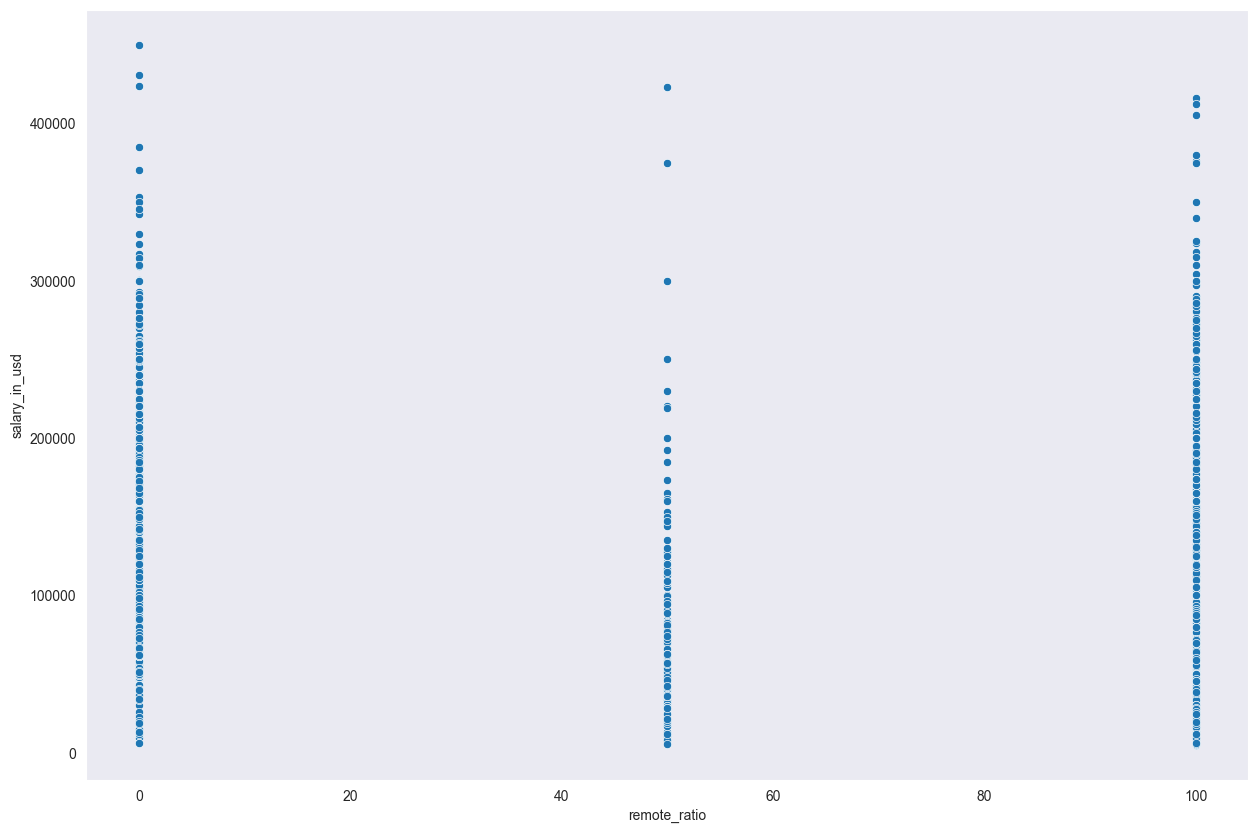

In [13]:
#temp = df.groupby(['job_title'])['salary_in_usd'].mean().sort_values(ascending=False)
#temp = df[df.job_title.isin(job)].groupby(['job_title', 'remote_ratio'])['salary_in_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(15,10))
sns.scatterplot(x=df.remote_ratio, y=df.salary_in_usd)

<Axes: >

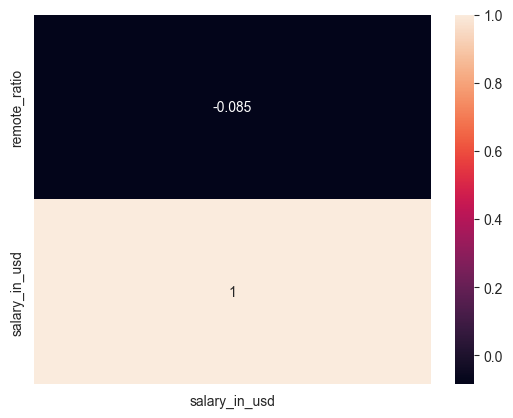

In [14]:
sns.heatmap(df[['remote_ratio', 'salary_in_usd']].corr()[['salary_in_usd']], annot=True)

<Axes: >

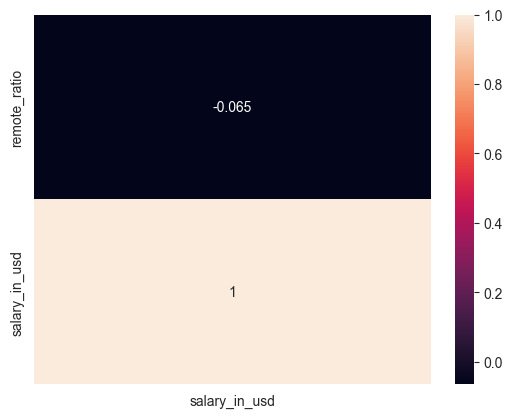

In [15]:
sns.heatmap(df[['remote_ratio', 'salary_in_usd']].corr('kendall')[['salary_in_usd']], annot=True)

Влияет ли удаленная работа на зарплату? Есть ли корреляция?

Практически нет. Незначительная отрицательная корреляция

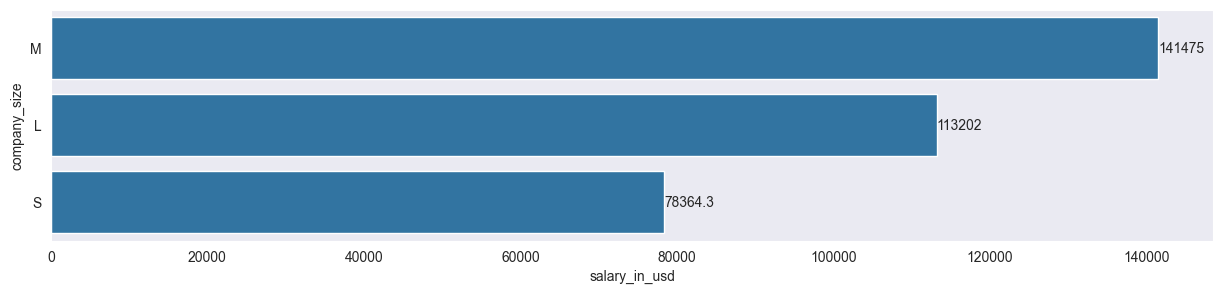

In [16]:
temp = df.groupby(['company_size'])['salary_in_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(15,3))
ax = sns.barplot(x=temp, y=temp.index, orient='h', order=temp.index)
ax.bar_label(ax.containers[0])
plt.show()

Зависит ли заработная плата от размера предприятия?

  да

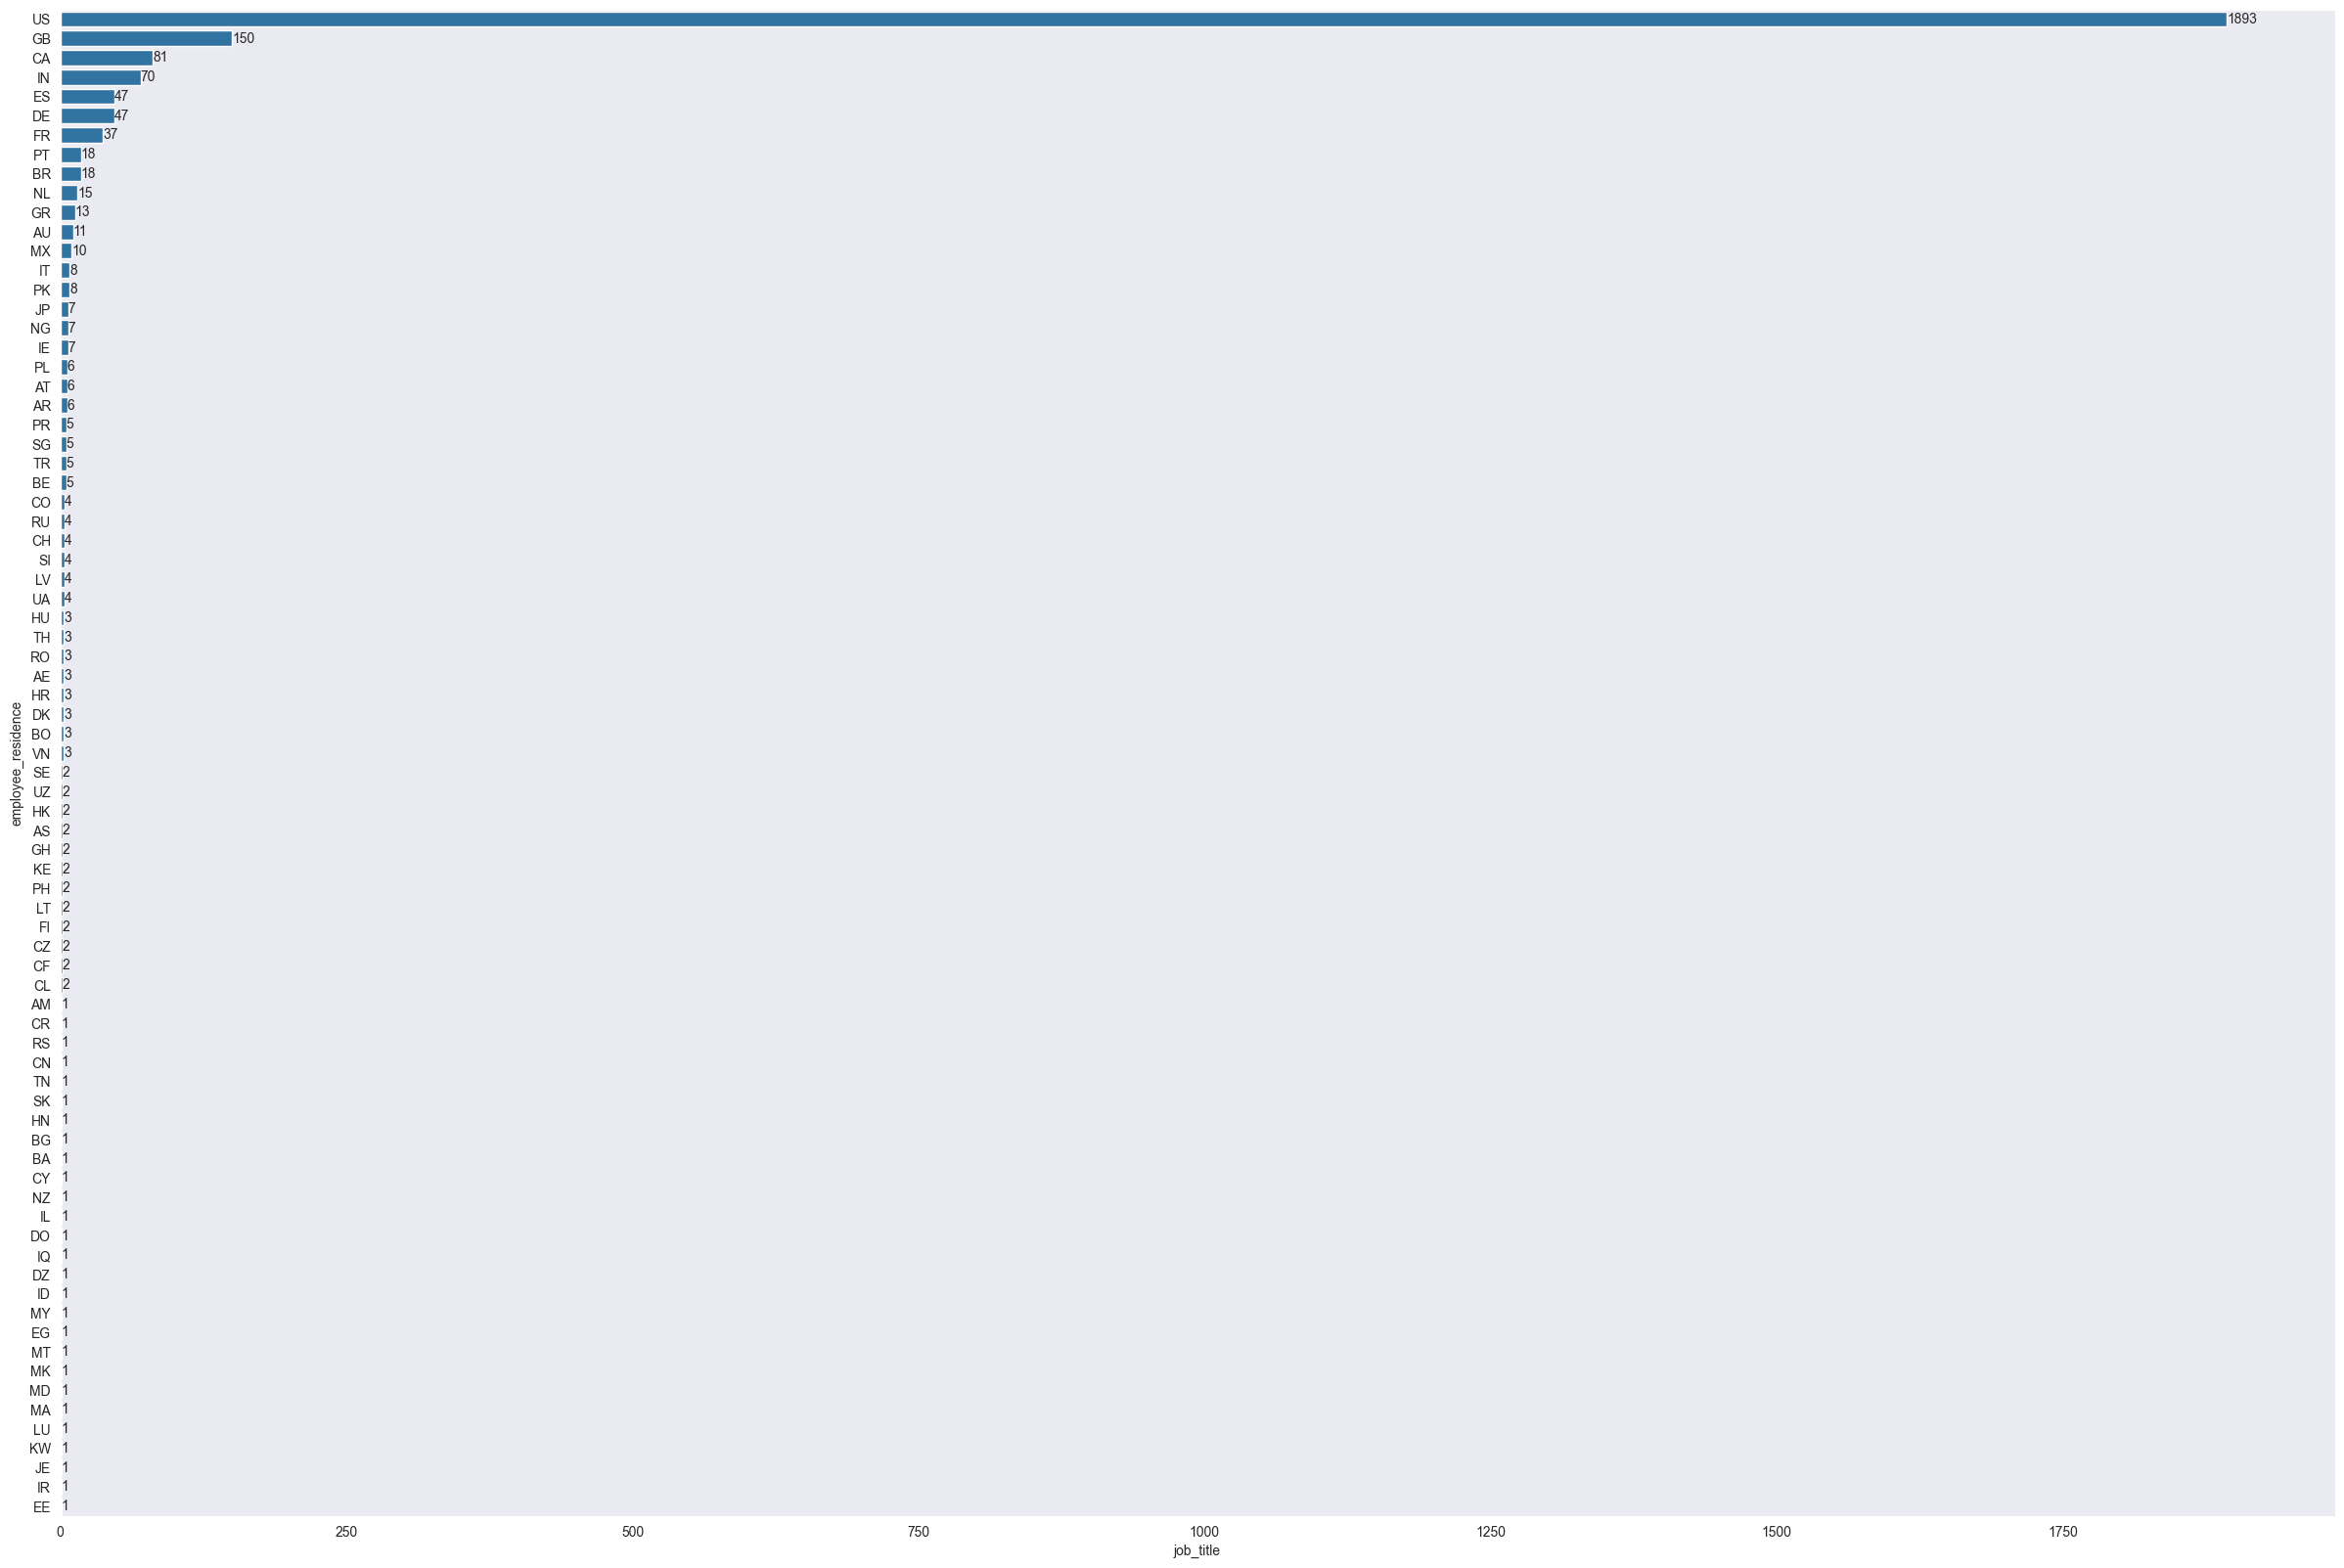

In [17]:
temp = df.groupby(['employee_residence'])['job_title'].count().sort_values(ascending=False)

plt.figure(figsize=(30,20))
ax = sns.barplot(x=temp, y=temp.index, orient='h', order=temp.index)
ax.bar_label(ax.containers[0])
plt.show()

Какие страны наиболее популярны среди вакансий?

США, Великобритания, Канада

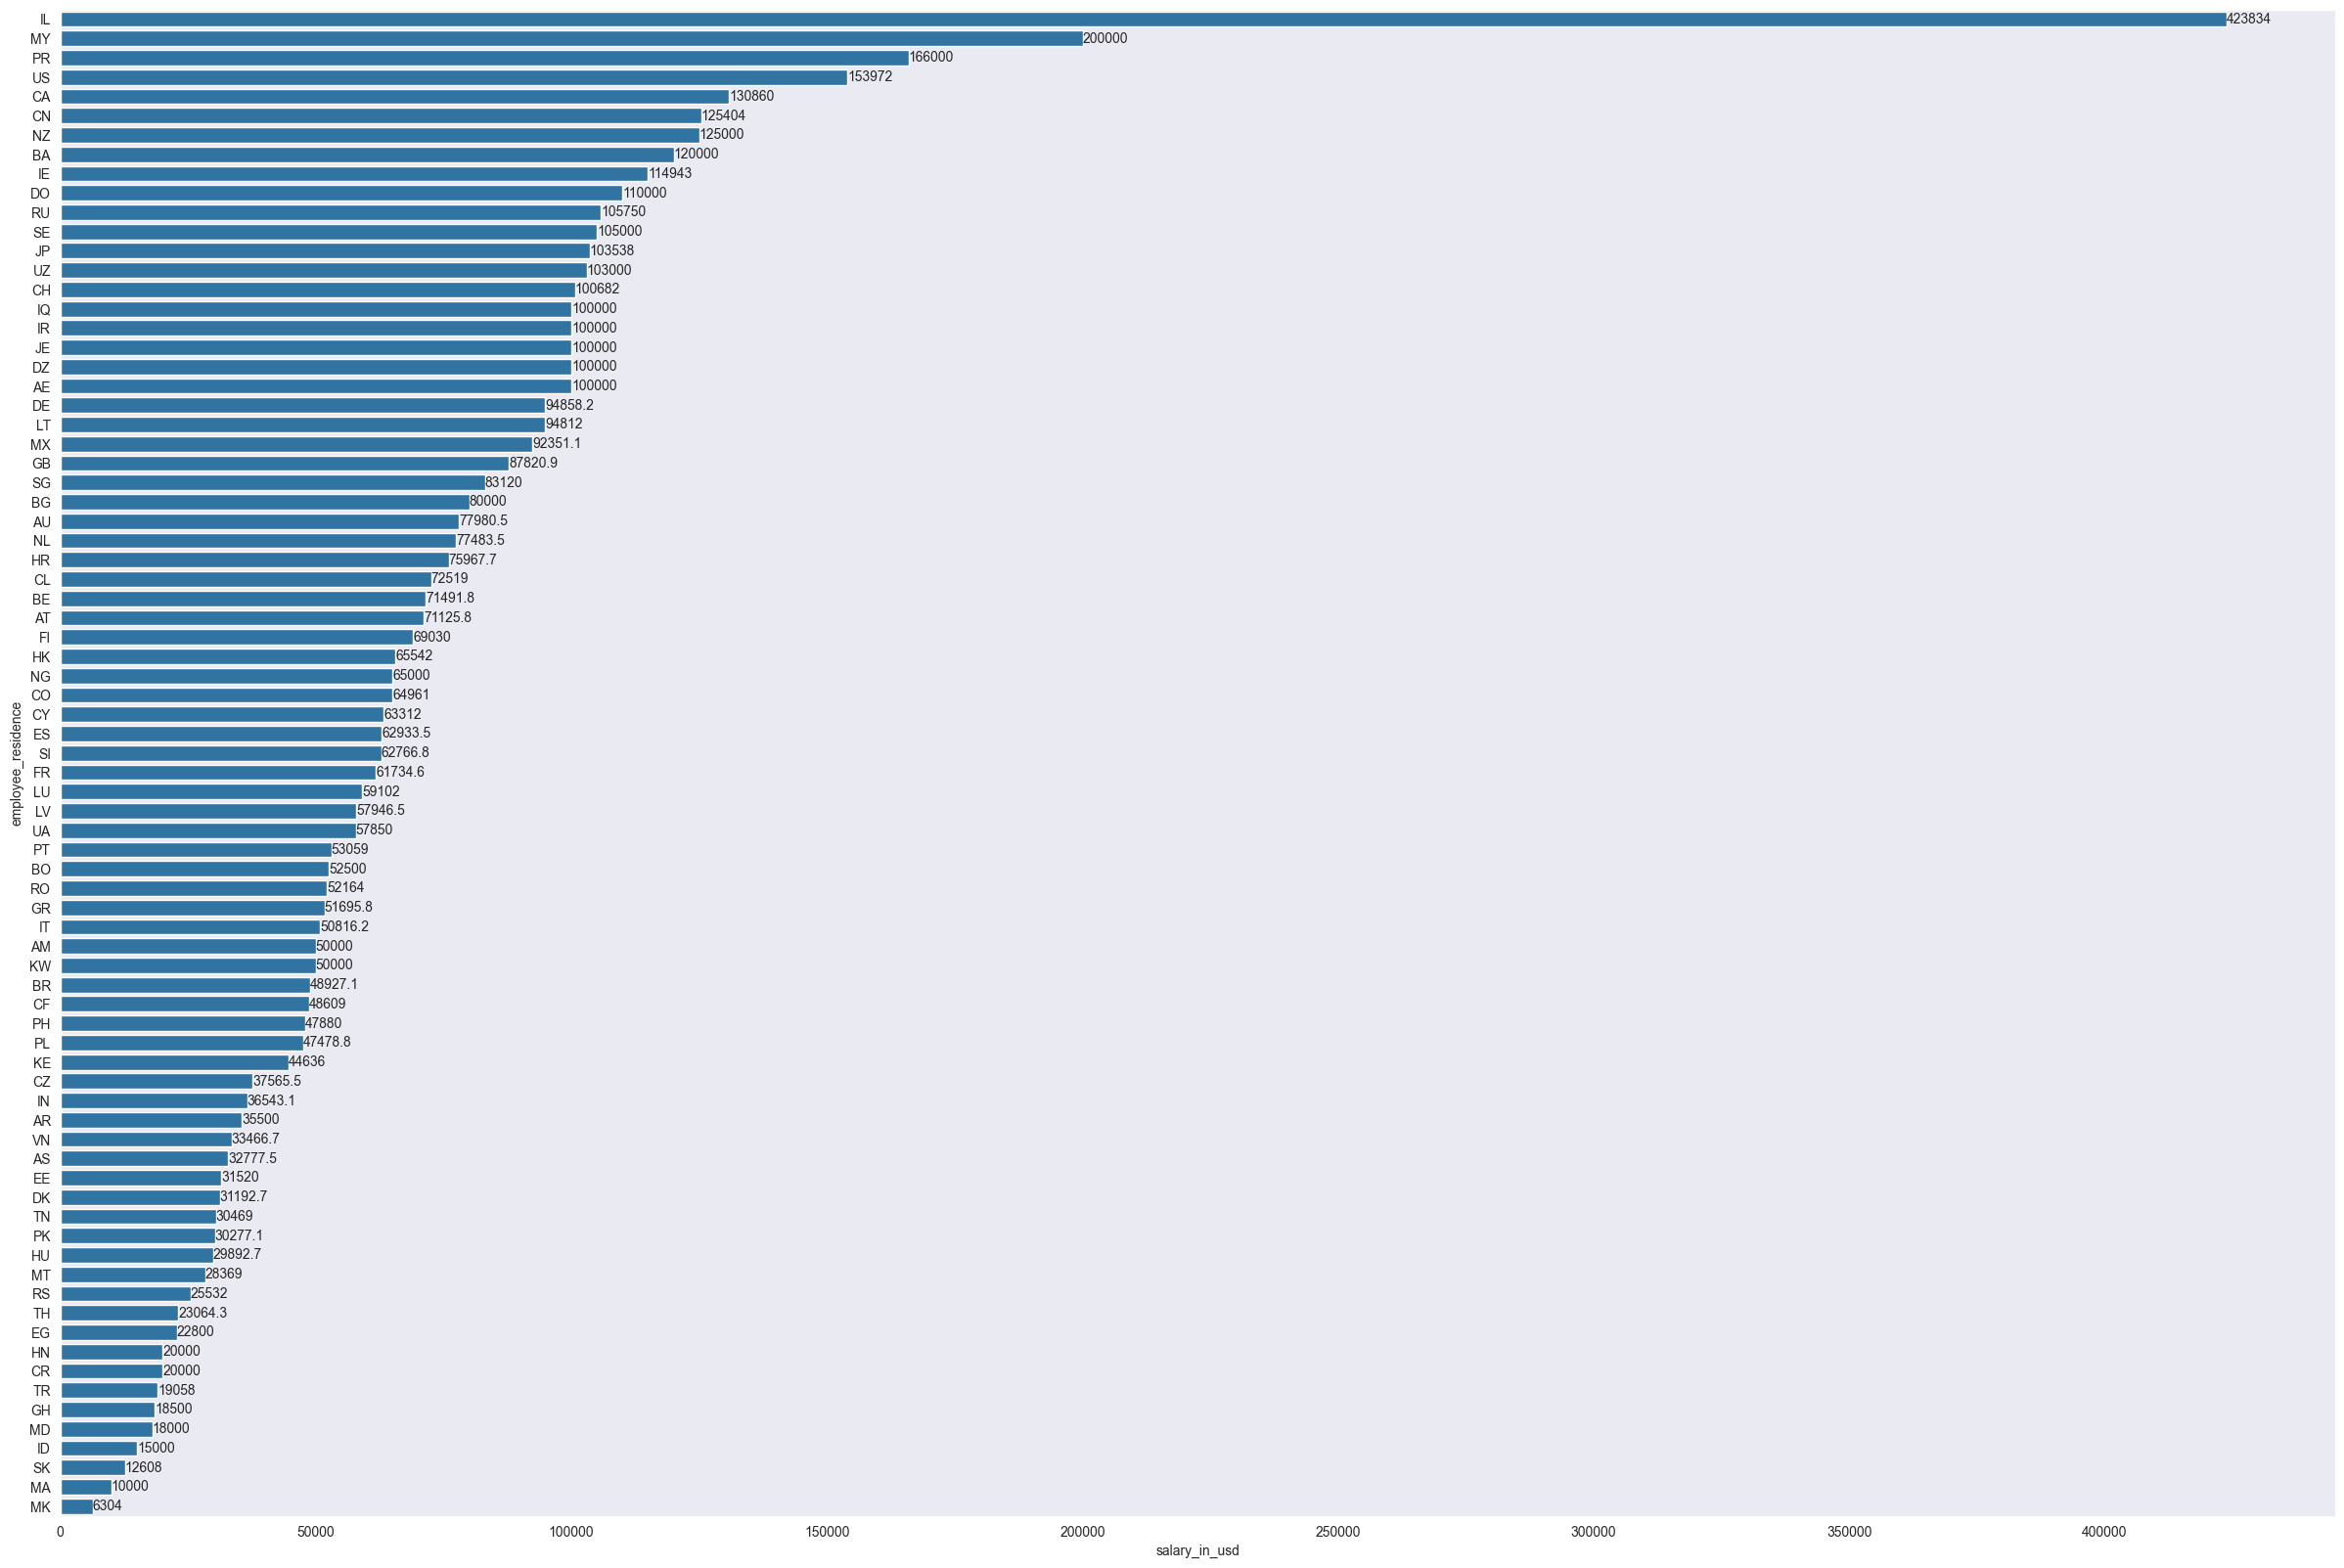

In [18]:
temp = df.groupby(['employee_residence'])['salary_in_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(30,20))
ax = sns.barplot(x=temp, y=temp.index, orient='h', order=temp.index)
ax.bar_label(ax.containers[0])
plt.show()

В каких заработная плата выше, а в каких ниже?

Если откинуть первые три места, на которые приходится всего 7 высокооплачиваемых мест, то лидеры по зп - США, Канада, Китай, а аутсайдеры Словакия, Марокко и Македония

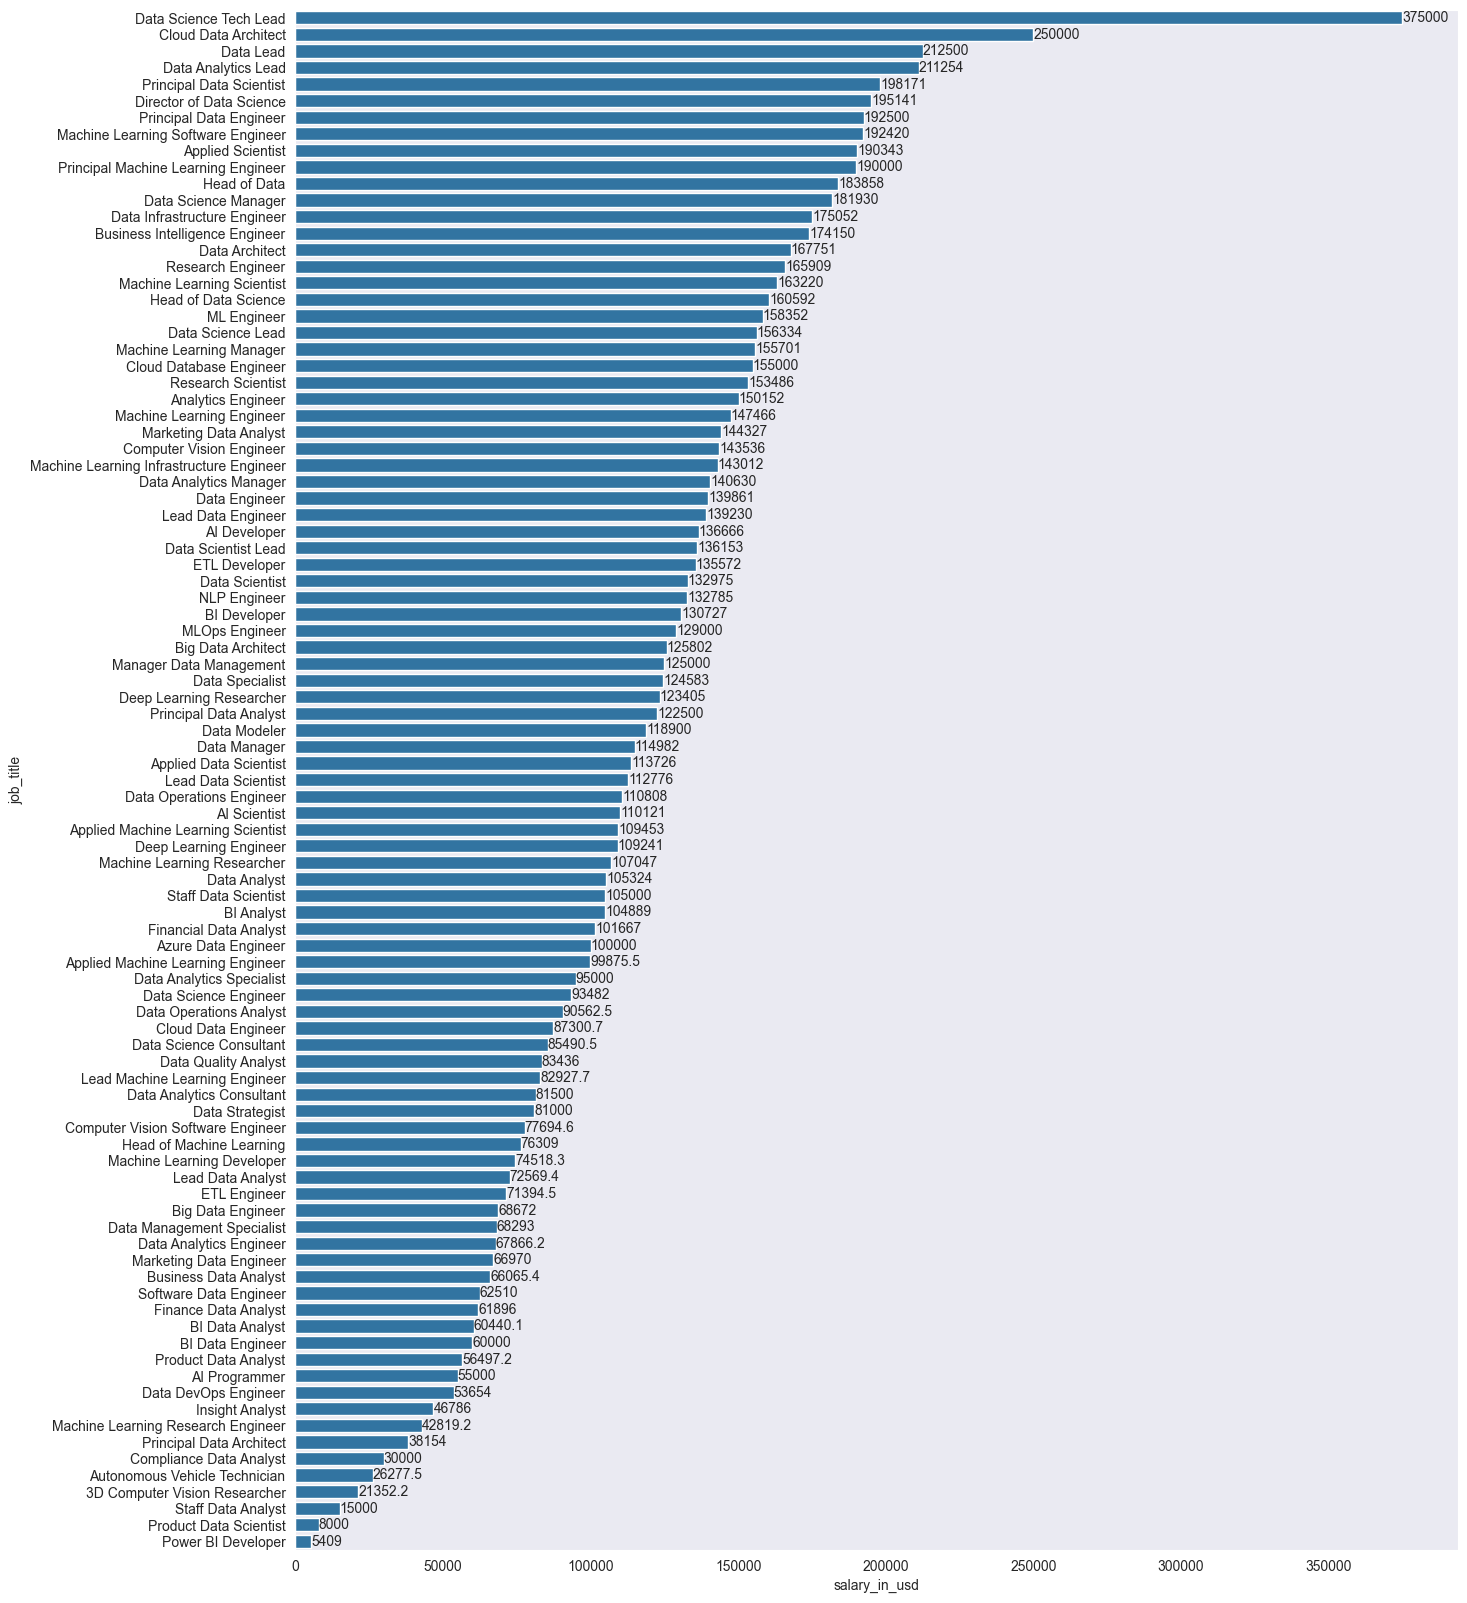

In [19]:
temp = df.groupby(['job_title'])['salary_in_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(15,20))
ax = sns.barplot(x=temp, y=temp.index, orient='h', order=temp.index)
ax.bar_label(ax.containers[0])
plt.show()

Оцените медианную зарплату для каждой должности.

Смотри график выше

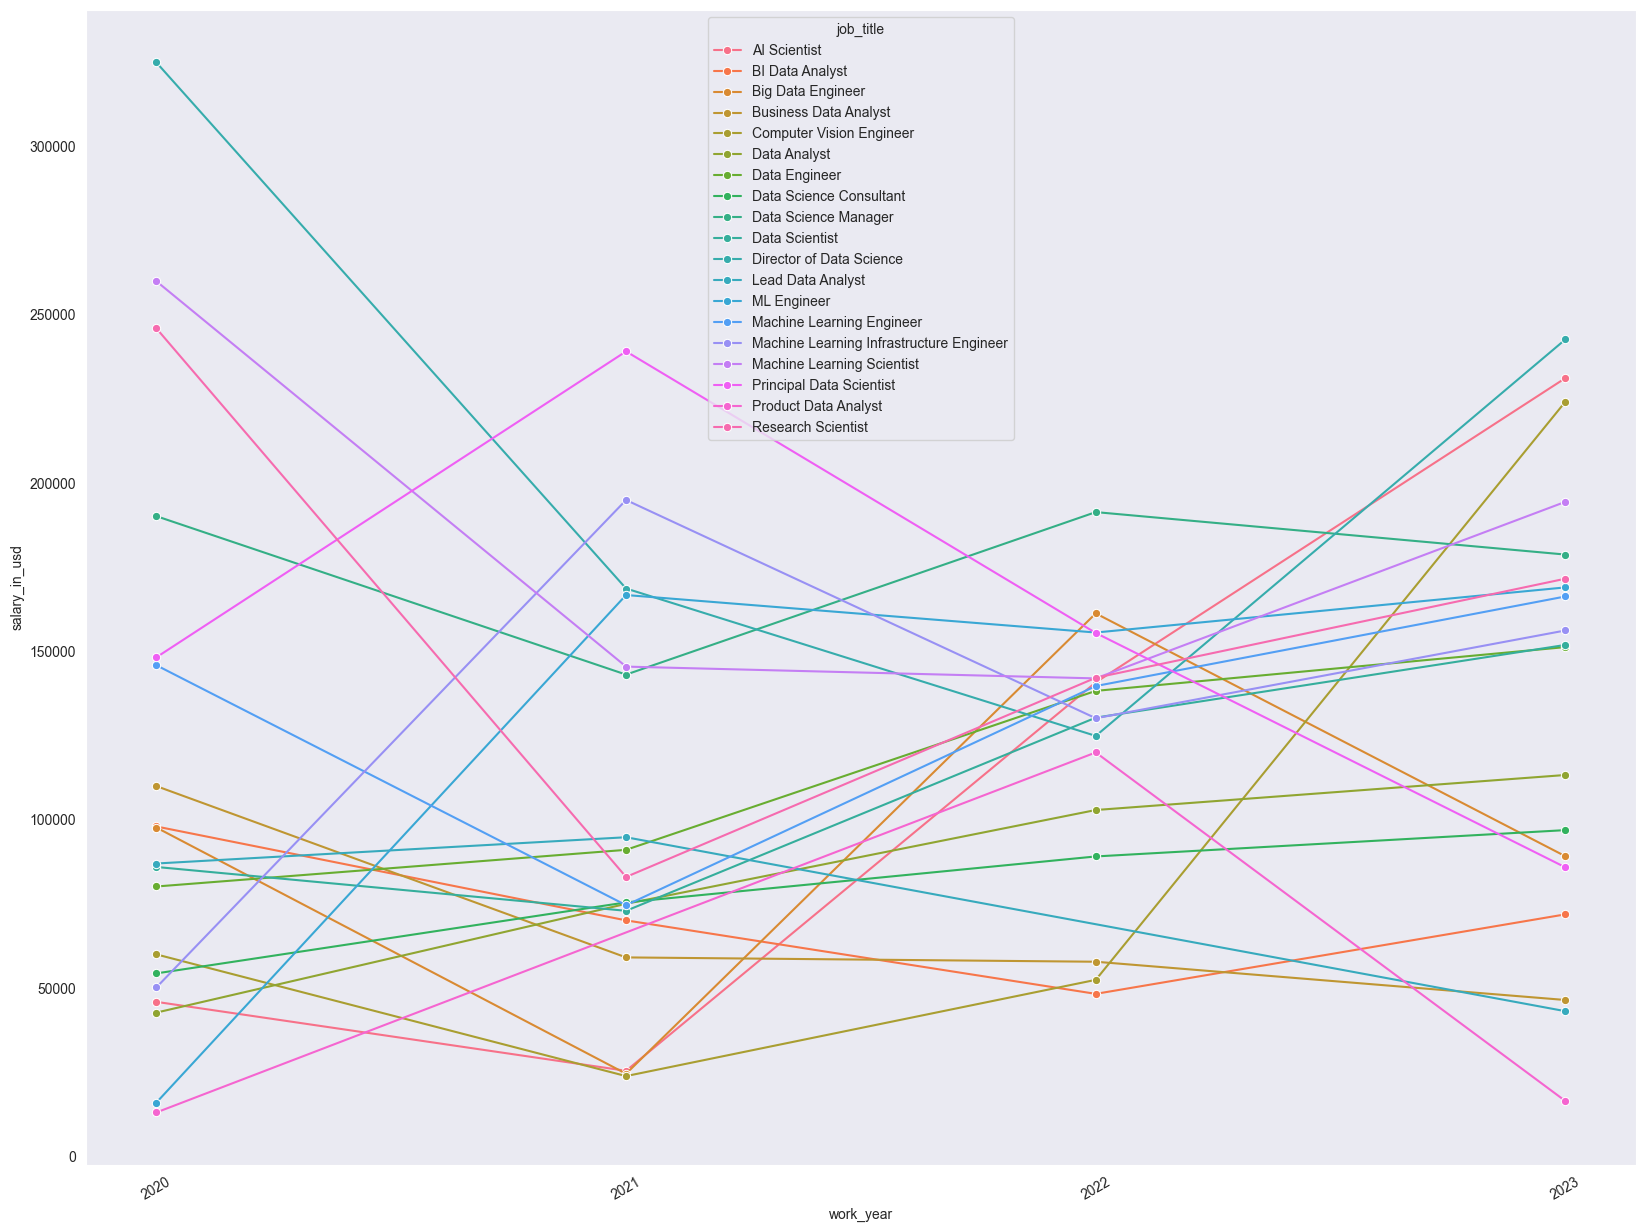

In [20]:
#temp = df.groupby(['job_title'])['salary_in_usd'].mean().sort_values(ascending=False)
#job = temp[:15].index
#temp = df[df.job_title.isin(job)].groupby(['job_title', 'work_year'])['salary_in_usd'].agg('mean').reset_index()

#temp = df.groupby(['job_title', 'work_year'])['salary_in_usd'].agg('mean').reset_index()[:10]

#tmp = df.groupby(['job_title'])['work_year'].agg('mean').reset_index()
#job = tmp[(tmp.work_year > 2020) & (tmp.work_year < 2023)].reset_index()


job2020 = df[df.work_year == 2020].reset_index()
job2023 = df[df.work_year == 2023].reset_index()
job = job2020[job2020.job_title.isin(job2023.job_title)] 

temp = df[df.job_title.isin(job.job_title)].groupby(['job_title', 'work_year'])['salary_in_usd'].agg('mean').reset_index()


plt.figure(figsize=(20,15))
ax = sns.lineplot(x=temp.work_year, y=temp.salary_in_usd, hue=temp.job_title, marker='o')
ax.set_xticks(temp.work_year.unique())
plt.xticks(rotation=30)
plt.show()


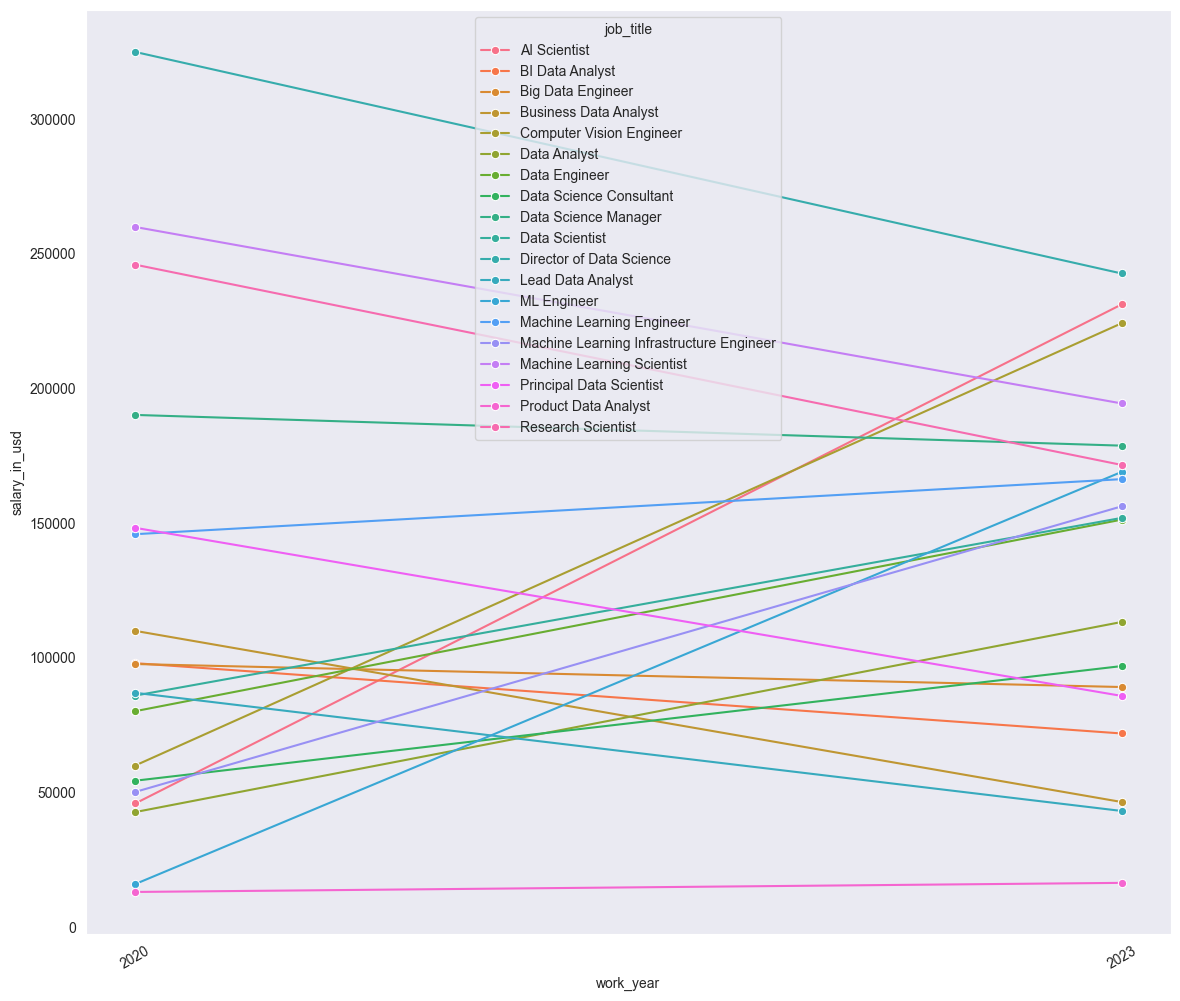

In [21]:
job2020 = df[df.work_year == 2020].reset_index()
job2023 = df[df.work_year == 2023].reset_index()
job = job2020[job2020.job_title.isin(job2023.job_title)] 

#temp = df[df.job_title.isin(job.job_title)].work_year.isin([2020, 2023]).groupby(['job_title', 'work_year'])['salary_in_usd'].agg('mean').reset_index()

temp = df[df.job_title.isin(job.job_title)].groupby(['job_title', 'work_year'])['salary_in_usd'].agg('mean').reset_index()
temp = temp[temp.work_year.isin([2020, 2023])].groupby(['job_title', 'work_year'])['salary_in_usd'].agg('mean').reset_index()


plt.figure(figsize=(14,12))
ax = sns.lineplot(x=temp.work_year, y=temp.salary_in_usd, hue=temp.job_title, marker='o')
ax.set_xticks(temp.work_year.unique())
plt.xticks(rotation=30)
plt.show()

In [46]:
temp

,job_title,work_year,salary_in_usd
0,AI Scientist,2020,45896.000000
1,AI Scientist,2023,231232.500000
2,BI Data Analyst,2020,98000.000000
3,BI Data Analyst,2023,71897.000000
4,Big Data Engineer,2020,97690.333333
5,Big Data Engineer,2023,89144.500000
6,Business Data Analyst,2020,110000.000000
7,Business Data Analyst,2023,46446.000000
8,Computer Vision Engineer,2020,60000.000000
9,Computer Vision Engineer,2023,224240.000000


In [35]:

# Создание нового столбца с разностью
def calculate_difference(row):
    if row['work_year'] == 2023:
        return row['salary_in_usd'] - temp.loc[temp['work_year'] == 2020, 'salary_in_usd'].iloc[row.name//2]  # предполагаем, что 2020 и 2023 идут парами
    else:
        return None  # или какое-то другое значение, если нужно

temp['Difference'] = temp.apply(calculate_difference, axis=1)

temp.sort_values(by='Difference', ascending=False)[:19].reset_index()

,index,job_title,work_year,salary_in_usd,Difference
0,1,AI Scientist,2023,231232.500000,185336.500000
1,9,Computer Vision Engineer,2023,224240.000000,164240.000000
2,25,ML Engineer,2023,169037.785714,153071.785714
3,29,Machine Learning Infrastructure Engineer,2023,156244.166667,106064.166667
4,13,Data Engineer,2023,151305.542751,71133.328465
5,11,Data Analyst,2023,113300.538462,70595.538462
6,19,Data Scientist,2023,151947.820628,65977.296818
7,15,Data Science Consultant,2023,96921.857143,42568.357143
8,27,Machine Learning Engineer,2023,166346.854369,20442.354369
9,35,Product Data Analyst,2023,16414.000000,3378.000000


Оцените, как сильно изменились зарплаты в 2023 году, относительно 2020. Какие должности стали более оплачиваемы, а какие нет?


у AI Scientist выросла на 185336$, а у Director of Data Science упала на 82271$. Подробнее в выборке выше и на графиках еще выше


In [36]:
temp = df.sort_values(by='salary_in_usd', ascending=False)[:5].reset_index()
temp

,index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2353,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
1,1352,2022,MI,FT,Data Analyst,350000,GBP,430967,GB,0,GB,M
2,427,2023,SE,FT,AI Scientist,1500000,ILS,423834,IL,0,IL,L
3,2576,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
4,2505,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S


Выявите портрет самого успешного и богатого работника: кем он должен работать, где проживать, удаленная ли работа.

Самый богатый работник в 2023 году AI Scientist из Израиля, не удалёнка

In [41]:
#temp = df.groupby(['employee_residence', 'company_location', 'remote_ratio'])['job_title'].agg('count').sort_values(ascending=False)[:20].reset_index()
#temp

Много ли людей работают и проживают в разных регионах? Где больше всего людей проживает и много ли из них (в процентном соотношении) 
работают удаленно на другую страну?

In [42]:
# Шаг 1: Определим, сколько сотрудников работают и проживают в разных регионах
different_regions = df[df['employee_residence'] != df['company_location']]
count_different_regions = different_regions.shape[0]

# Шаг 2: Определим регионы с наибольшим количеством людей
residence_counts = df['employee_residence'].value_counts()
most_common_region = residence_counts.idxmax()
most_common_count = residence_counts.max()

# Шаг 3: Рассчитаем процент сотрудников, работающих удаленно из других стран
# Сначала фильтруем сотрудников, работающих удаленно с удаленной локацией
remote_from_different_country = different_regions[different_regions['remote_ratio'] > 0]

# Процент сотрудников, работающих удаленно из других стран
if count_different_regions > 0:
    remote_percentage = (remote_from_different_country.shape[0] / count_different_regions) * 100
else:
    remote_percentage = 0

# Вывод результатов
print(f'Количество сотрудников, работающих и проживающих в разных регионах: {count_different_regions}')
print(f'Регион с наибольшим количеством людей: {most_common_region} (количество: {most_common_count})')
print(f'Процент сотрудников, работающих удаленно из другого региона: {remote_percentage:.2f}%')

Количество сотрудников, работающих и проживающих в разных регионах: 96
Регион с наибольшим количеством людей: US (количество: 1893)
Процент сотрудников, работающих удаленно из другого региона: 92.71%
